# CS131 FINAL PROJECT
Various Image Filters, Winslow Church, Fall 2022

In [1]:
# import necessary libraries
import cv2
import random
import numpy as np
from scipy import ndimage, misc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
import os, sys

First let's take a look at our original picture

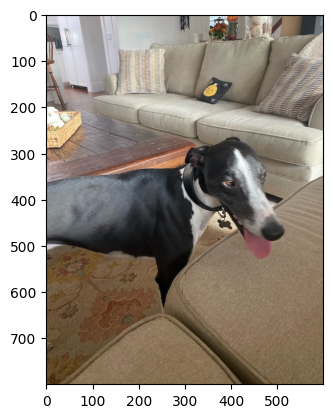

In [3]:
#image_path = r"./images/me.JPG"
#image_path = r"./images/grumpycat.JPG"
#image_path = r"./images/mydog.jpeg"
image_path = r"./images/alsomydog.jpeg"

original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(original_image)

# CARTOON FILTER

(800, 600)


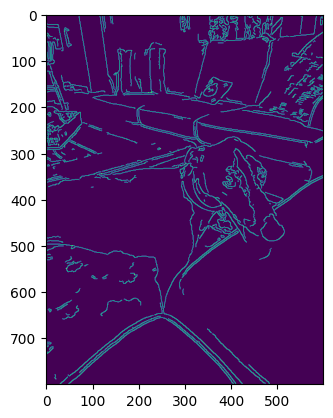

In [4]:
# Mask created by our canny edge detector
from edge import canny
from skimage import io

img = io.imread(image_path, as_gray=True)
edges = canny(img, kernel_size=5, sigma=1.4, high=0.03, low=0.02)
edges = np.array(edges)
print(edges.shape)
plt.imshow(edges)

In [5]:
# Mask created by built in openCv function
def create_mask(image):
    current = cv2.cvtColor(image, 6)
    current_blur = cv2.medianBlur(current, 5)
    rmask = cv2.adaptiveThreshold(current_blur, 200, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 4)
    print(rmask.shape)
    return rmask

#Unhash to see mask
#plt.imshow(create_mask(original_image))

In [6]:
# Soften and merge the colors of the original image
def map_color(image):
    data = np.float32(image).reshape((-1, 1))
    mc = (3, 10, 1.5)
    comps, labels, center = cv2.kmeans(data, 9, None, mc, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    labels.flatten()
    result = center[labels]
    return result.reshape(image.shape)

# Unhash to see the new image
#plt.imshow(map_color(original_image))

In [8]:
# Now we just combine our two previous functions to create a cartoon!
def cartoony(image):
    cmask = create_mask(image)    
    img = map_color(image)
    cartoon = cv2.bitwise_and(img, img, mask = cmask)
    cartoon = cv2.cvtColor(cartoon, 5)
    return cartoon

(800, 600)


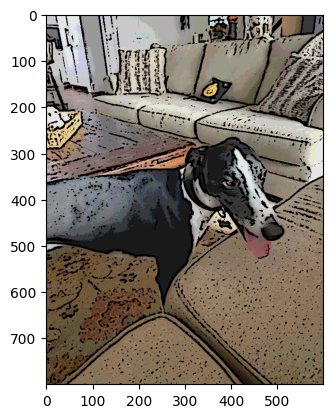

In [9]:
# Show our result
cartoony_image = cv2.imread(image_path)
cartoony_image = cartoony(cartoony_image)
plt.imshow(cartoony_image)

# BLOCKY COLOR FILTER
Implemented through iterations of bilateral filtering

In [10]:
def blocky_colorify(img):
    result = cv2.bilateralFilter(original_image, 20, 22, 20)
    for i in range(30):
        result = cv2.bilateralFilter(result, 20, 22, 20) 
    return result

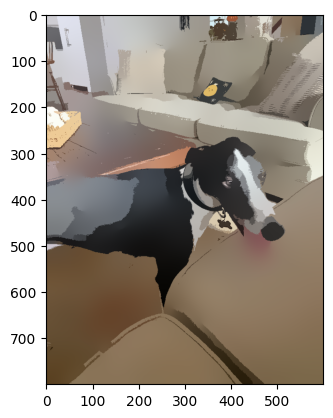

In [11]:
# Show our result
blocky_image = cv2.imread(image_path)
blocky_image = blocky_colorify(blocky_image)
plt.imshow(blocky_image)

# BONUS : COLOR POP FILTER

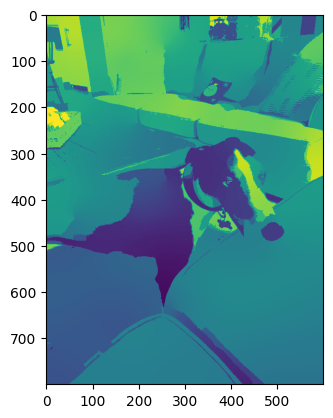

In [12]:
# Exact same as blocky color
def color_popify(img):
    result = cv2.bilateralFilter(original_image, 20, 22, 20)
    for i in range(100):
        result = cv2.bilateralFilter(result, 20, 22, 20)
    result = cv2.cvtColor(result, 6)
    return result

color_pop_image = cv2.imread(image_path)
color_pop_image = color_popify(color_pop_image)
plt.imshow(color_pop_image)

# SEPIA FILTER

In [13]:
def sepia_filter(image):
    image_shape = image.shape
    # iterate through pixels
    for x in range(image_shape[0]):
        for y in range(image_shape[1]):
            (b,g,r) = image[x][y]   
            
            # find new RGB values to create sepia effect
            new_b = int(0.393 * r + 0.769 * g + 0.189 * b)
            new_g = int(0.349 * r + 0.686 * g + 0.168 * b)
            new_r = int(0.272 * r + 0.534 * g + 0.131 * b)
            
            if new_r > 255: 
                new_r = 255
            if new_b > 255: 
                new_b = 255
            if new_g > 255: 
                new_g = 255
                
            # update original RGB values of pixel
            image[x][y] = (new_b, new_g, new_r)
    return image

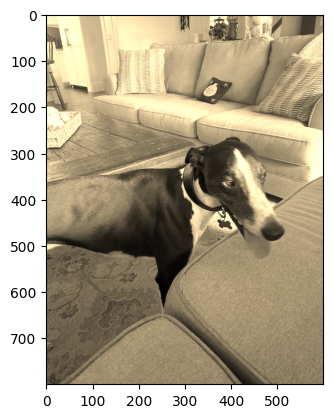

In [14]:
# Show our result
sepia_image = cv2.imread(image_path)
sepia_image = sepia_filter(sepia_image)
plt.imshow(sepia_image)

# THE END